In [1]:
# imports used throughout this notebook
from pyspark.sql import DataFrame, Column, Window
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

# add homemade helpers
sys.path.insert(1, '../scripts')
import helpers.join_helpers as jh
import helpers.plot_helpers as ph

DEBUGGING = False

# add homemade helpers
sys.path.insert(1, '../scripts')
import helpers.join_helpers as jh
import helpers.plot_helpers as ph

In [2]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName('MAST30034 XT Project 1')
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config('spark.sql.repl.eagerEval.enabled', True) 
    .config('spark.sql.parquet.cacheMetadata', 'true')
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/15 00:13:23 WARN Utils: Your hostname, Polaris resolves to a loopback address: 127.0.1.1; using 172.22.173.58 instead (on interface eth0)
22/08/15 00:13:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/15 00:13:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/15 00:13:25 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
# read in the aggregated covid data
flu_df = spark.read.parquet('../data/curated/virals/flu/aggregated/cases-by-week')
flu_df.limit(5)

week_year,week_month,week_ending,week_index,timeline,borough,population,tot_cases,tot_pc_cases,tot_p100k_cases
2020,3,2020-03-21,116,keep for graphing,Staten Island,495522.0,30.0,6.054221608727766E-5,6.054221608727766
2019,5,2019-05-11,71,pre,Bronx,1418207.0,18.0,1.269208232648689...,1.2692082326486895
2019,12,2019-12-14,102,keep for graphing,Manhattan,1628706.0,259.0,1.590219474846903E-4,15.90219474846903
2021,12,2021-12-18,207,neither,Staten Island,493494.0,207.0,4.194579873311529...,41.945798733115296
2020,10,2020-10-31,148,post,Bronx,1466438.0,2.0,1.363849000094105...,0.13638490000941056


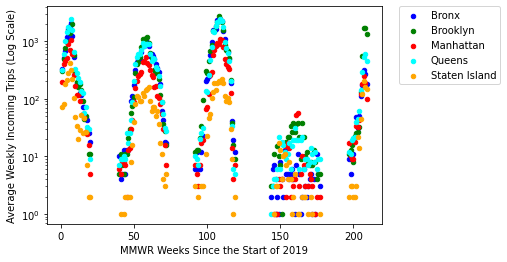

In [4]:
# plot a time-series histogram to show how average weekly trips changes per week
ph.scatter(flu_df.toPandas(), 'week_index', 'tot_cases',
    xlabel = 'MMWR Weeks Since the Start of 2019', 
    ylabel = 'Average Weekly Incoming Trips', logy=True)